## 'Exploratry Data Analysis' (EDA) on Gobal terrorist attacks

TASK 4 :   EDA ON GLOBAL TERRORIST ATTACKS 

Internship- Data Science and Business Analyst

Under-The sparks foundation (GRIP)

Done by : Maruthi Sai Lingampalli

### Objective of the analysis: 

To analyze the terrorist attackes across the globe that were happened between 1970 to 2017 and also to make some measures and attempts to ensure the security of the world to minimize the attackes that caueses huge damage to the scocity based on the data provided in the data set.

![ttile](terror.jpg)

### Importing necessary python libraries 

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sea
import plotly.express as px
%matplotlib inline

### Data preparation 

In [2]:
# loading the csv file which contain all the data of terrorist attackes in the world.
terror=pd.read_csv('M:\GRIP TSF\\terror.csv',encoding=('iso-8859-13'),low_memory=False)

In [3]:
# Checking the head of the dataframe
terror.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# geting the all info of the data
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
# shape of the dataset
terror.shape

(181691, 135)

In [6]:
# getting the names of  all columns, that are there in the dataset
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# all the columns names are inserted into the col_names list
col_names=[]
# all the null values that are present in each column are inserted into col_nulls list
col_nulls=[]
for a in terror.columns:
    col_names.append(a)
    col_nulls.append(f'{a} ---- {terror[a].isnull().sum()}')
# First 50 columns are loaded in a variable    
f_50=col_names[:51]
# From 50 to 100 columns are loaded in a variable 
m_50=col_names[51:101]
# From 100 to 134 columns are loaded in a variable 
l_34=col_names[101:135]

In [8]:
# checking the all columns names 
col_names

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

## Data cleaning 

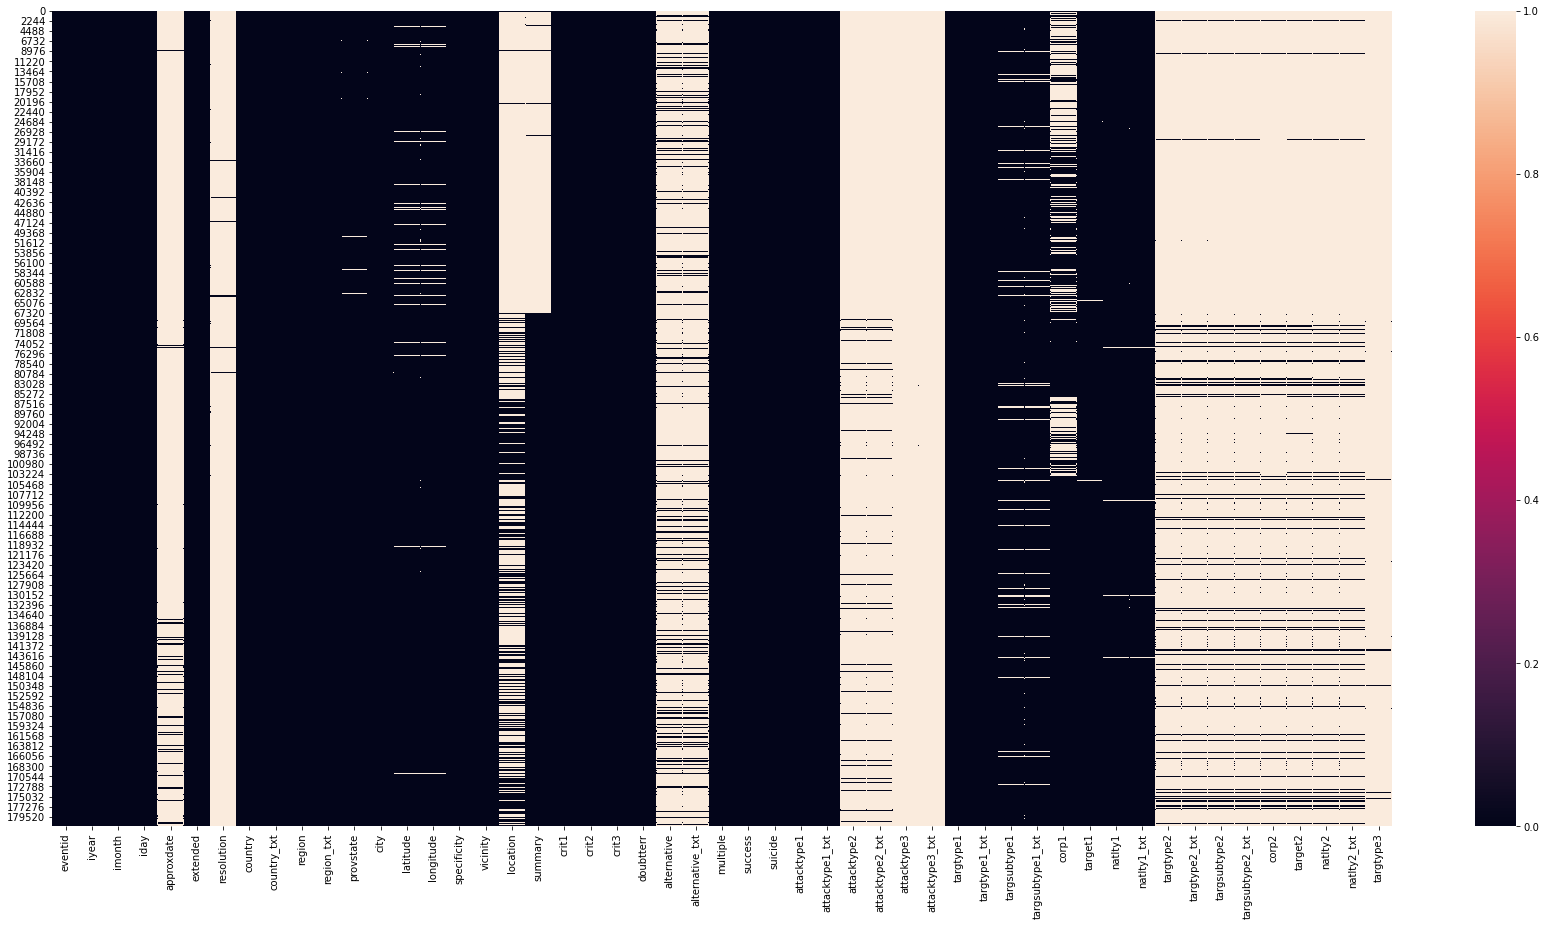

In [9]:
# plotting the columns from 1 to 50  in a heat map to spot any null values 
mat.subplots(figsize=(30,15))
sea.heatmap(terror[f_50].isnull())

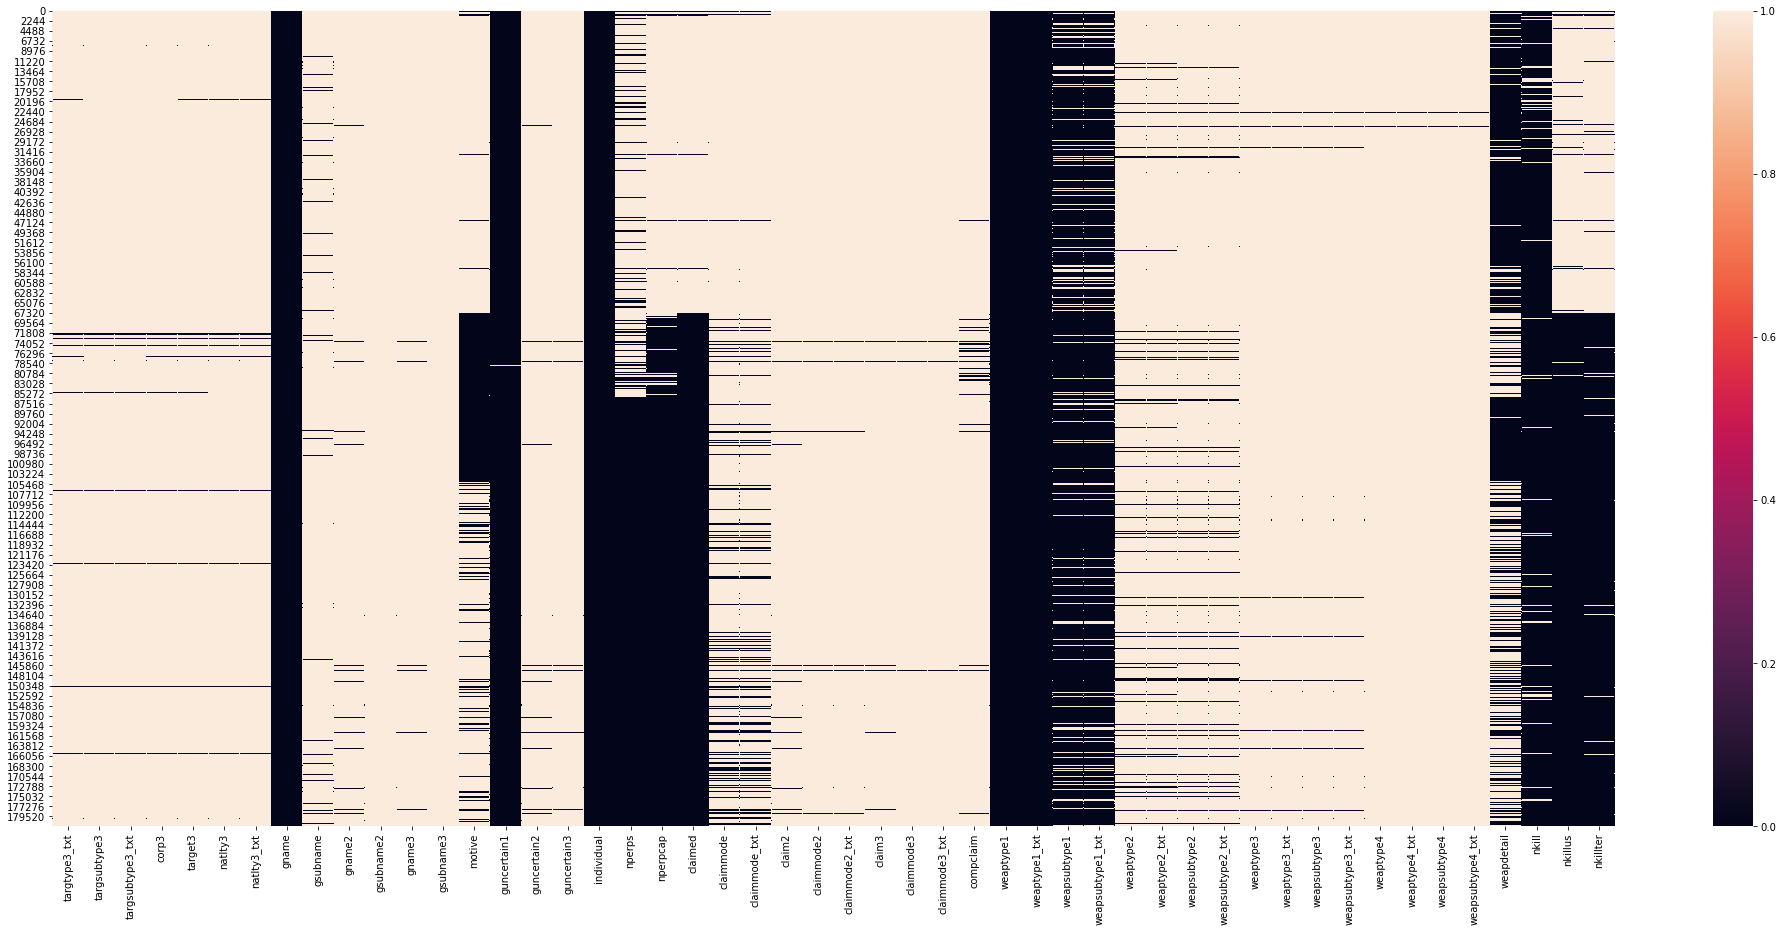

In [10]:
# plotting the columns from 50 to 100  in a heat map to spot any null values 
mat.subplots(figsize=(35,15))
sea.heatmap(terror[m_50].isnull())

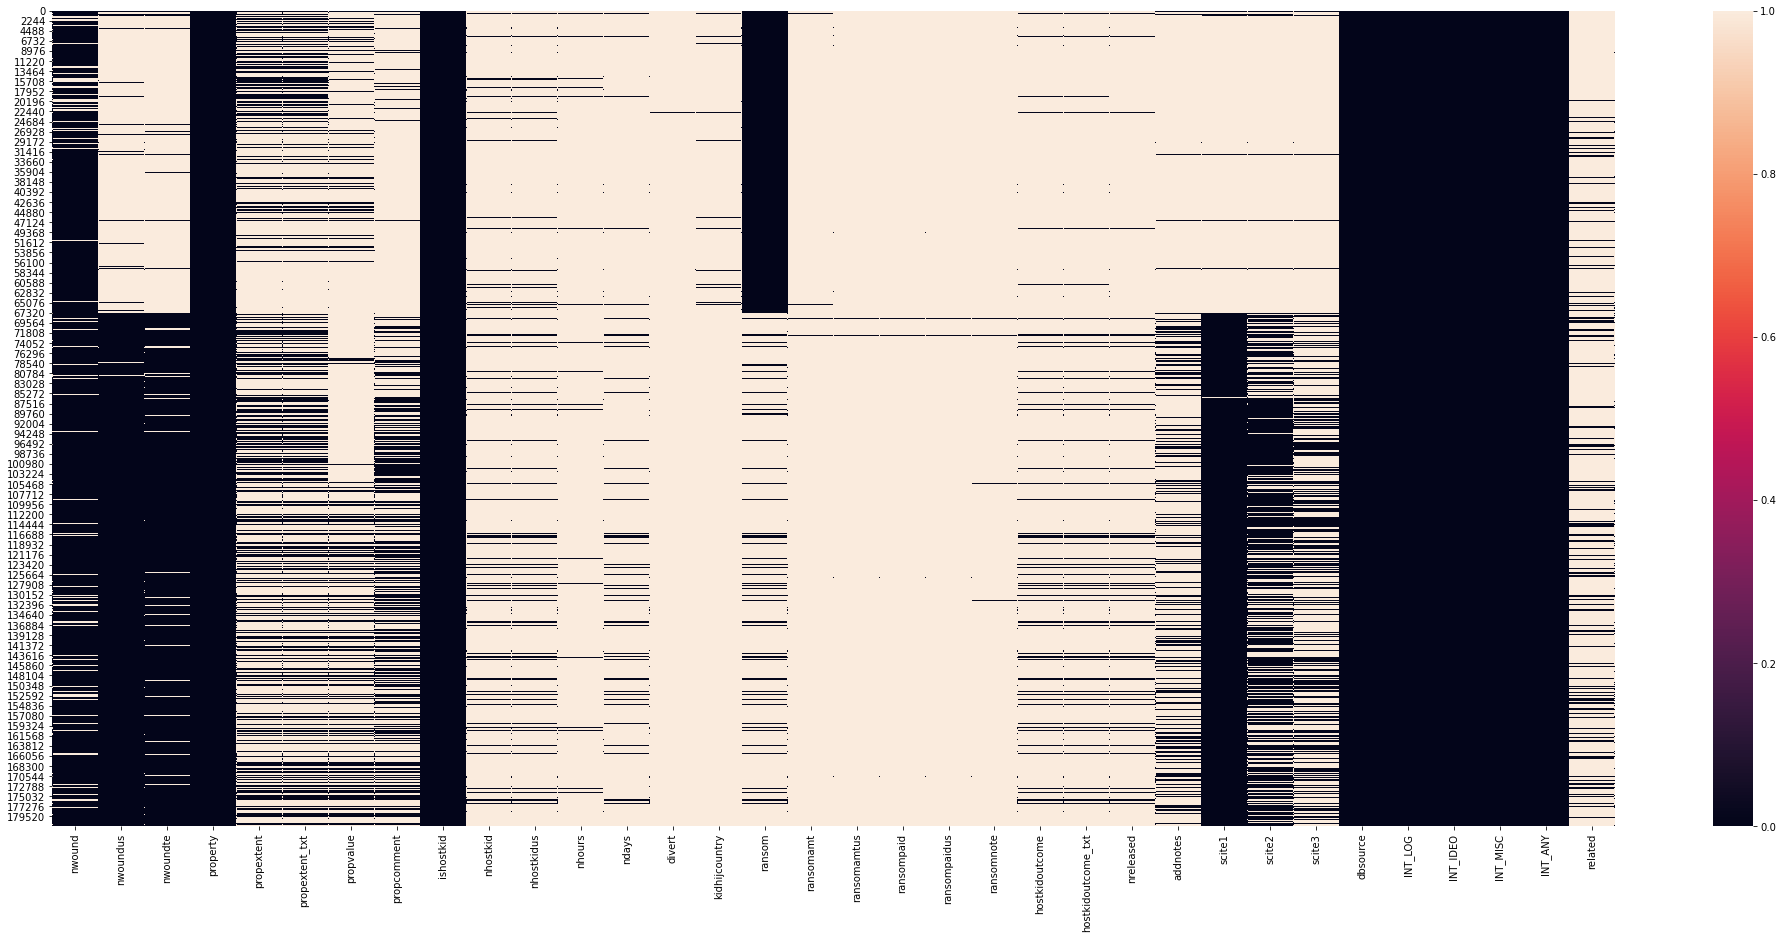

In [11]:
# plotting the columns from 100 to 134  in a heat map to spot any null values 
mat.subplots(figsize=(35,15))
sea.heatmap(terror[l_34].isnull())

In [12]:
# After finding out the columns with huge portion of null values i concluded these are the best columns to analyze the attackes
Df=terror[['iyear',
           'country',
           'country_txt',
           'region','region_txt',
           'provstate', 
           'success','suicide',
           'attacktype1',
           'attacktype1_txt',
           'targtype1',
           'targtype1_txt',
           'targsubtype1',
           'targsubtype1_txt',
           'corp1','gname', 
           'weaptype1',                                  
           'weaptype1_txt',                     
           'weapsubtype1',                              
           'weapsubtype1_txt',    
           'weapdetail',                             
           'nkill',                                                                                                   
           'property', 
           'ishostkid',  
           'dbsource']]


### 1. Dealing with null values 

In [13]:
# checking again in the actual dataset for any null values
Df.isnull().sum()

iyear                   0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1        10373
targsubtype1_txt    10373
corp1               42550
gname                   0
weaptype1               0
weaptype1_txt           0
weapsubtype1        20768
weapsubtype1_txt    20768
weapdetail          67670
nkill               10313
property                0
ishostkid             178
dbsource                0
dtype: int64

In [14]:
Df.dtypes

iyear                 int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
gname                object
weaptype1             int64
weaptype1_txt        object
weapsubtype1        float64
weapsubtype1_txt     object
weapdetail           object
nkill               float64
property              int64
ishostkid           float64
dbsource             object
dtype: object

In [ ]:
# filling the catagorical values with mode of the respective column
l=['targsubtype1_txt','corp1','weaptype1_txt','weapsubtype1_txt','weapdetail','provstate']
for a in l:
    Df.loc[:,('new '+a)]=Df[a].fillna(Df[a].mode()[0])

In [ ]:
# filling the integers values with mean of the respective column
m=['targsubtype1','weapsubtype1','nkill','ishostkid']
for b in m:
    Df.loc[:,('new '+b)]=Df[b].fillna(Df[b].mean())

In [18]:
# Again checking for any null values  
Df.isnull().sum()

iyear                   0
country                 0
country_txt             0
region                  0
region_txt              0
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
gname                   0
weaptype1               0
property                0
dbsource                0
new targsubtype1_txt    0
new corp1               0
new weaptype1_txt       0
new weapsubtype1_txt    0
new weapdetail          0
new provstate           0
new targsubtype1        0
new weapsubtype1        0
new nkill               0
new ishostkid           0
dtype: int64

## Data Visualization

### Correlation between columns in the dataset

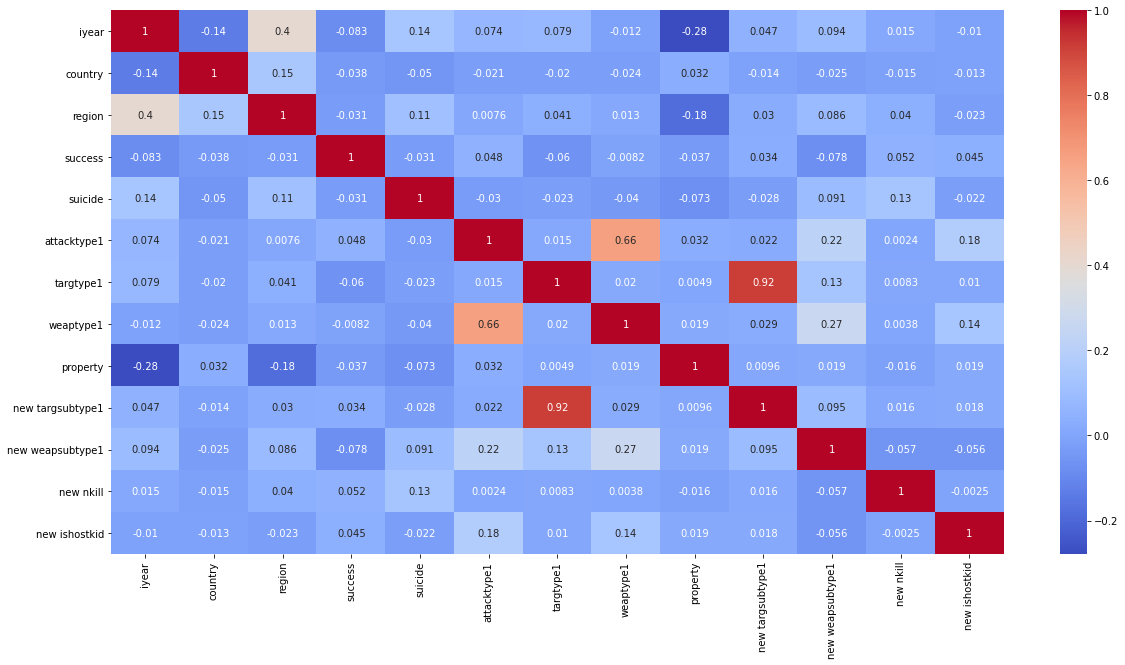

In [19]:
# finding the relation between the columns
mat.subplots(figsize=(20,10))  
sea.heatmap(Df.corr(),annot=True,cmap='coolwarm')    

from the correlation heatmap, we have medium positive correlation among feauters and only (property - iyear ) has a strong negative correlation
 

In [20]:
Df.columns

Index(['iyear', 'country', 'country_txt', 'region', 'region_txt', 'success',
       'suicide', 'attacktype1', 'attacktype1_txt', 'targtype1',
       'targtype1_txt', 'gname', 'weaptype1', 'property', 'dbsource',
       'new targsubtype1_txt', 'new corp1', 'new weaptype1_txt',
       'new weapsubtype1_txt', 'new weapdetail', 'new provstate',
       'new targsubtype1', 'new weapsubtype1', 'new nkill', 'new ishostkid'],
      dtype='object')

### 1.Trend of the attacks between 1970-2017 

Text(0.5, 0, 'Year')

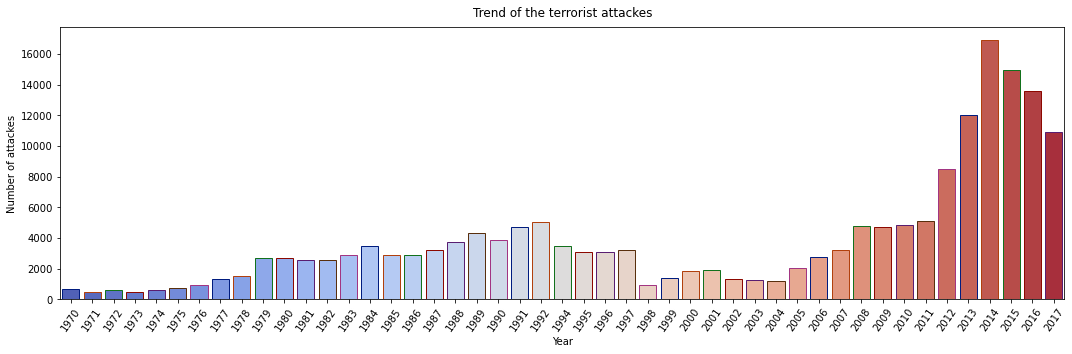

In [60]:
mat.subplots(figsize=(18,5))
sea.countplot(Df.iyear,palette='coolwarm',edgecolor=sea.color_palette('dark',7))
mat.xticks(rotation=55)
mat.title('Trend of the terrorist attackes',pad=10.5)
mat.ylabel('Number of attackes')
mat.xlabel('Year')

[ keynotes ]
1.The trend of the terrorist attacks are increasing very rapidly to a umimaginable extent year-on-year 

2.but, during 1992-2004 the attacks in world decreased suddenly from a peak number.
  

### 2. Top 20 Countries who were hit by high  terror attacks  

Text(0.5, 0, 'Country names')

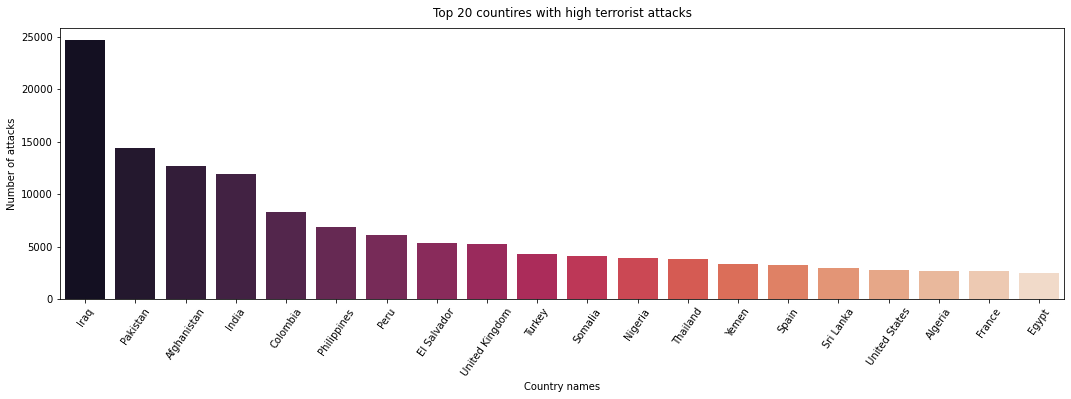

In [71]:
mat.subplots(figsize=(18,5))
sea.barplot(Df.country_txt.value_counts()[:20].index,Df.country_txt.value_counts()[:20].values,palette='rocket')
mat.xticks(rotation=55)
mat.title('Top 20 countires with high terrorist attacks',pad=10.5)
mat.ylabel('Number of attacks')
mat.xlabel('Country names')

[keynotes] 1.Iraq is the most effected country in the world with highest terror attacks

2. Top 3 countries [Iraq, Pakistan, Afganisthan] are belongs to Islamic religion mostly.

### 3.Top 30 safe countires by terror attacks 

Text(0.5, 0, 'Country names')

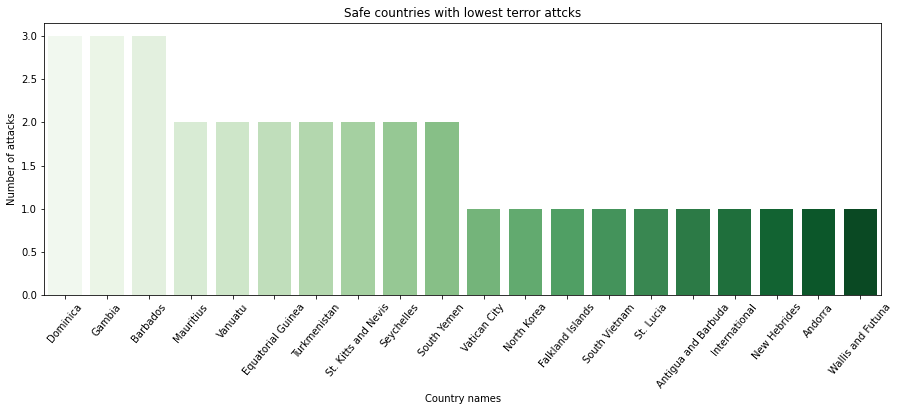

In [72]:
mat.subplots(figsize=(15,5))
sea.countplot(Df.country_txt,order=Df.country_txt.value_counts()[185:].index,palette='Greens')
mat.xticks(rotation=50)
mat.title('Safe countries with lowest terror attcks')
mat.ylabel('Number of attacks')
mat.xlabel('Country names')

[keynotes] 1.Top 30 countries where we can see lowest terror attacks

2. Mostly among these countries, majority are the Islands and less populated regions in the world

### 4. People killed from 1970-2017 in terrorist attacks

Text(0.5, 0, 'Year')

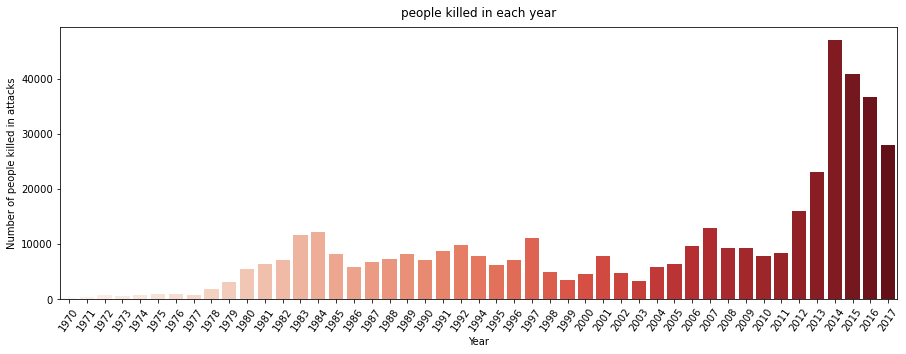

In [73]:
mat.subplots(figsize=(15,5))
sea.barplot(Df.groupby('iyear')['new nkill'].sum().index,Df.groupby('iyear')['new nkill'].sum().values,palette='Reds')
mat.xticks(rotation=55)
mat.title('people killed in each year',pad=10.5)
mat.ylabel('Number of people killed in attacks')
mat.xlabel('Year')

[keynotes] 1.many people were killed in past 12 years with peak numbers recorded between 2004-2017

2. This proves that more number of people are beeing killed due to miscellaneous groups across the world.

### 5. People killed in number of terrorist attacks 

Text(0.5, 0, 'country name')

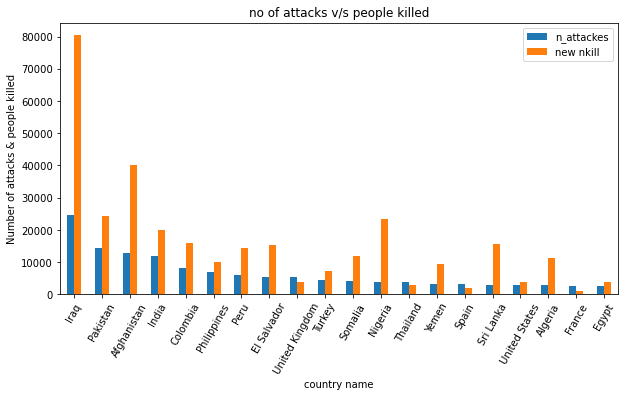

In [74]:
cou1=Df.country_txt.value_counts()[:20].to_frame()
gh=Df.groupby('country_txt')['new nkill'].sum().to_frame()
cou1.columns=['n_attackes']
cou1.merge(gh,left_index=True,right_index=True).plot.bar()
fig=mat.gcf()
fig.set_size_inches(10,5)
mat.xticks(rotation=60)
mat.title('no of attacks v/s people killed')
mat.ylabel('Number of attacks & people killed')
mat.xlabel('country name')

[keynotes] 1.The above graph depicts us that with less  attempts of attacks, terrorists are successfull in killing high number of people

2. Its also shows us that how people in Iraq , Pakisthan , Afganisthan are suffuring from these terrorist attacks and also the security positions of these countries are very bad in operatons

### 6. Continental regions with terrorist attacks 

Text(0.5, 1.0, 'continental wise regions with terrorist attacks')

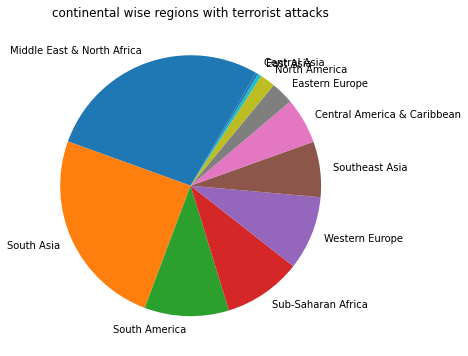

In [75]:
values=Df.region_txt.value_counts()[:11].values
labelsd=Df.region_txt.value_counts()[:11].index
mat.subplots(figsize=(6,6))
mat.pie(values,labels=labelsd,startangle=60)
mat.title('continental wise regions with terrorist attacks')

[keynotes] 1.From the pie chart it is very clear that most of the attacks are occuring in Middle east,  North america and    South Asia

### 7. Most dangerous terrorist groups in the world 

Text(0.5, 0, 'People killed ')

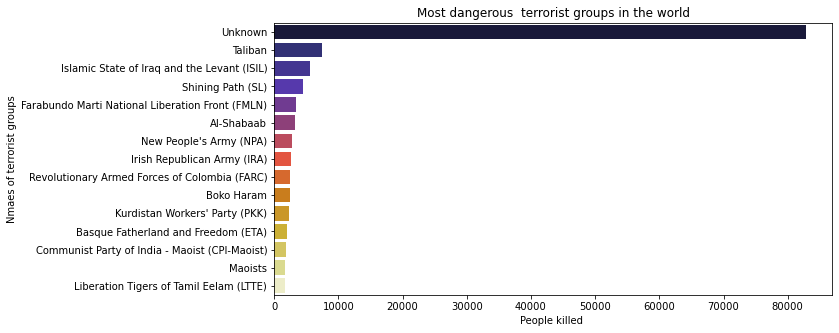

In [65]:
mat.subplots(figsize=(10,5))
sea.barplot(Df.gname.value_counts()[:15].values,Df.gname.value_counts()[:15].index,palette='CMRmap')
mat.title('Most dangerous  terrorist groups in the world')
mat.ylabel('Nmaes of terrorist groups')
mat.xlabel('People killed ')

[keynotes] 1. the most dangerous terrorist groups in the world are taliban and isil

2. Major and  many attacks were happened by some anynomous groups which works for their own believes without mentioning their name to the world are not known till now.

### 8. Success rate of the attacks across the world  

Text(0, 0.5, 'Number of attacks')

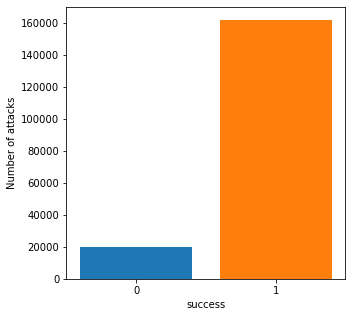

In [76]:
mat.subplots(figsize=(5,5))
sea.countplot(Df.success,saturation=1)
mat.ylabel('Number of attacks')


[keynotes] 1.  The above report tells us that most of the attempts done by terrorist groups are successfull.



In [49]:
success=Df.success.value_counts()
print(f'The percentage of failuer in a terrorist attack is {np.round((success[0]/success[1])*100,2)}%')

The percentage of failuer in a terrorist attack is 12.41%


2. The failuer percentage is 12% which tell us the  very bad security conditions of the countries.

### 9.  Types of attacking methods used in terrorist attacks

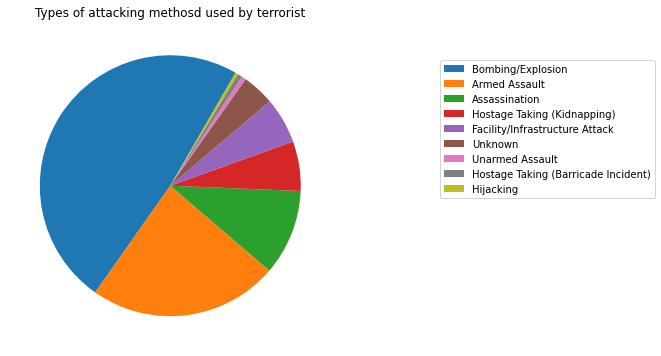

In [50]:
values=Df.attacktype1_txt.value_counts().values
labelsd=Df.attacktype1_txt.value_counts().index
mat.subplots(figsize=(6,6))
mat.pie(values,startangle=60)
mat.title('Types of attacking methosd used by terrorist')
mat.legend(labelsd,loc='upper right',bbox_to_anchor=(2,0.9))

[keynotes] 1.Most all terrorist groups using Bombing/Explosive method for destruction which is very ease to operate for them

2. Second main method is arms, with huge supply of arms, they are choosing this method

### 10. People killed in various attacking methods 

Text(0.5, 0, 'People died')

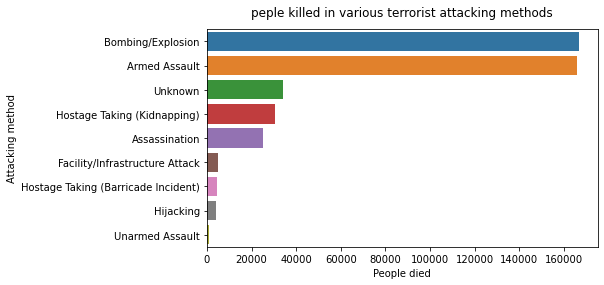

In [69]:
mat.subplots(figsize=(7,4))
labels=Df.groupby('attacktype1_txt')['new nkill'].sum().sort_values(ascending=False).index
values=Df.groupby('attacktype1_txt')['new nkill'].sum().sort_values(ascending=False).values
sea.barplot(values,labels)
mat.title('peple killed in various terrorist attacking methods',pad=13)
mat.ylabel('Attacking method')
mat.xlabel('People died')

[keynotes] 1  .Majorly people were killed due to bombing and armed assault

### 11. Key Targets for terrorist attacks

Text(0.5, 1.0, 'Targets for terrorist attacks')

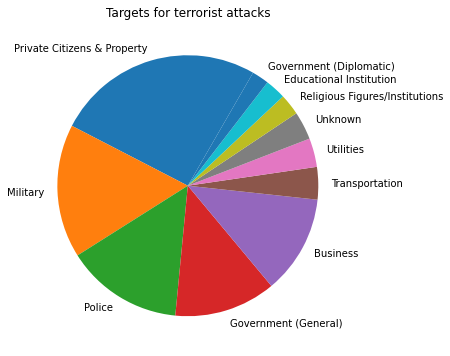

In [77]:
values=Df.targtype1_txt.value_counts()[:11].values
labelsd=Df.targtype1_txt.value_counts()[:11].index
mat.subplots(figsize=(6,6))
mat.pie(values,labels=labelsd,startangle=60)
mat.title('Targets for terrorist attacks')

[keynotes] 1.The major targets are private citizen & property, Military, Police

2. Military and government are the key targets for terrorists.

### 12. Weapon types used in terrorist attacks 

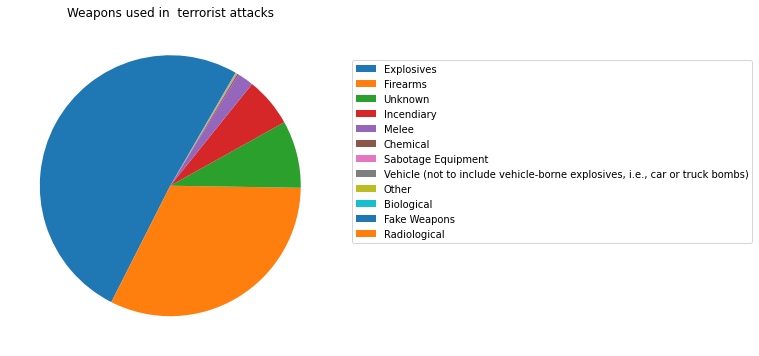

In [78]:
values=Df['new weaptype1_txt'].value_counts().values
labelsd=Df['new weaptype1_txt'].value_counts().index
mat.subplots(figsize=(6,6))
mat.pie(values,startangle=60)
mat.title('Weapons used in  terrorist attacks')
mat.legend(labelsd,loc='upper right',bbox_to_anchor=(2.3,0.9))

[keynotes] 1. Explosives are the most used weapon in terrorist attacks.

2. Firearms and Explosives are making the desctruction in the world

### 13. Specific weapons employed in attacked 

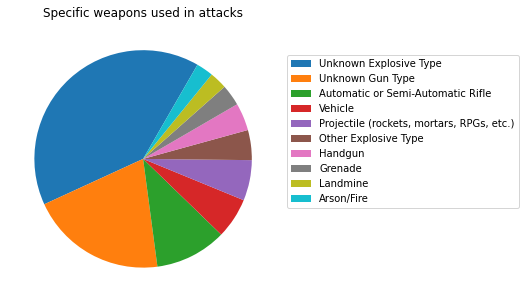

In [79]:
values=Df['new weapsubtype1_txt'].value_counts()[:10].values
labelsd=Df['new weapsubtype1_txt'].value_counts()[:10].index
mat.subplots(figsize=(5,5))
mat.pie(values,startangle=60)
mat.title('Specific weapons used in attacks')
mat.legend(labelsd,loc='upper right',bbox_to_anchor=(1.9,0.9))

[keynotes] 1. Most common weapons that were used in terror attacks are explosives and advanced guns


### 14. Sleeper cell attacks between 1970-2017 

Text(0.5, 0, 'Year')

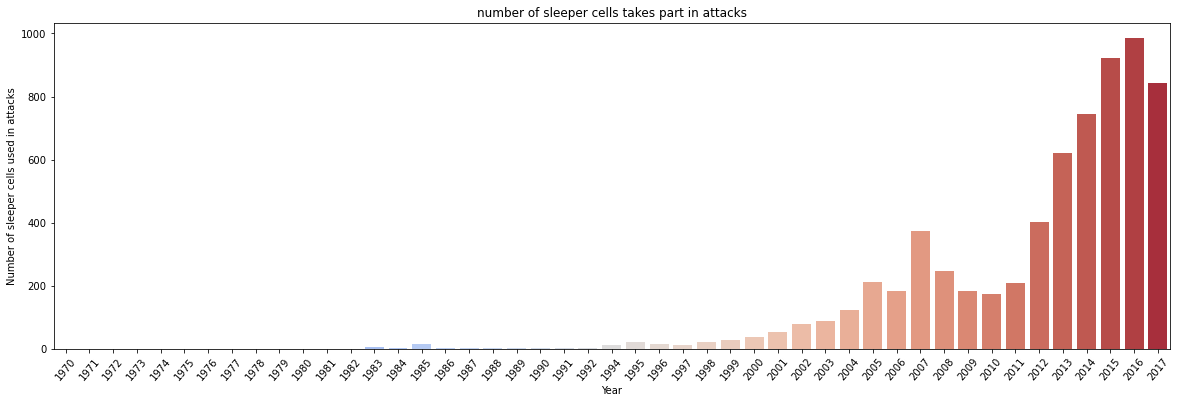

In [80]:
values=Df.groupby('iyear')['suicide'].sum().values
labelsd=Df.groupby('iyear')['suicide'].sum().index
mat.subplots(figsize=(20,6))
sea.barplot(labelsd,values,palette='coolwarm')
mat.xticks(rotation=50)
mat.title('number of sleeper cells takes part in attacks')
mat.ylabel('Number of sleeper cells used in attacks')
mat.xlabel('Year')

[keynotes] 1.Number of sleeper cells (suicide) are increasing very dramatically to cause huge damages to society

2. This is very dangerous method among all other attacking methods in terrorism

### 16. Grapical resentation of terrorist attacks in each country on the Globe. 

In [58]:
terrordf=Df.groupby(('country_txt'),as_index=False).count()
fig=px.choropleth(terrordf,locations='country_txt',locationmode='country names',color='iyear',hover_name='country_txt',
                     projection='orthographic',title='countries with no of people killed from 1970-2017',labels={'iyear':'new nkill'})
fig.show()

## Final Conclusions

* The world security is degrading into much lower levels in the recent times.
* The main method in terrorist attacks is Exsplosives and arms.
* Mostly we cannot find a terror attack free country.
* Prime targets for terror attacks are government and millatry.
* Terrorist groups are choosing sleeper cells as main weapon for attacking.
* Mostly unknown groups are killing most of the people.
* Mostly any terror attacks, are having a most successfull success rate.